In [152]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [153]:
iris = load_iris()

In [154]:
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [155]:
iris_vareity = iris.target

In [156]:
iris_data = iris_data.drop(['petal length (cm)', 'petal width (cm)', 'target'], axis=1)

In [157]:
F_train, F_test, i_train, i_test = train_test_split(iris_data, iris_vareity, test_size=0.25)

In [158]:
lda = LinearDiscriminantAnalysis()
lda.fit(F_train, i_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [159]:
lda.predict(F_test)

array([0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 2, 0])

In [160]:
model_result = pd.DataFrame([i_test, lda.predict(F_test)]).T
model_result

,0,1
0,0,0
1,0,1
2,2,2
3,0,0
4,0,0
5,2,2
6,0,0
7,1,2
8,1,2
9,0,0


In [161]:
accuracy_score(i_test, lda.predict(F_test))

0.7105263157894737

In [162]:
lda.coef_

array([[-6.80467011, 10.25236512],
       [ 1.38222132, -3.53688043],
       [ 4.39552671, -5.3101424 ]])

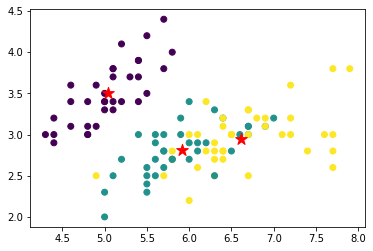

In [163]:
plt.scatter(F_train['sepal length (cm)'], F_train['sepal width (cm)'], c=i_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [164]:
scaler = StandardScaler()

In [165]:
# fit-transform сразу обучается и преобразует данные
iris_data_scaled = scaler.fit_transform(iris_data)

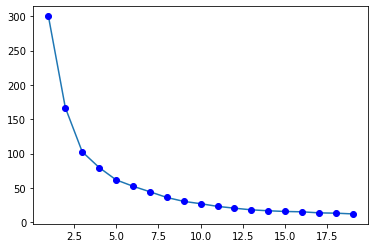

In [166]:
k_inertia = []
for k in range(1, 20):
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'bo')

In [167]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(iris_data_scaled)
clusters

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 0, 1, 4, 4, 4, 2, 3, 3, 4, 2, 4, 2, 2, 3, 2, 3, 3, 4,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 3, 2, 2, 2, 3, 3, 3, 4, 4, 2,
       3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 4, 4, 2, 4, 3, 4,
       4, 3, 4, 2, 3, 4, 4, 4, 4, 2, 4, 3, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4,
       3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

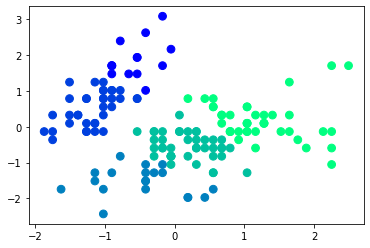

In [168]:
plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1], cmap='winter', c=clusters, s=60)